In [1]:
import numpy as np
import pandas as pd
import matplotlib  as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.3.0'

In [6]:
#taking the datasets from Keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


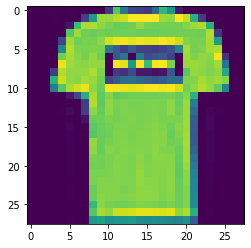

In [8]:
#accessing different images present in the current dataset by their position 
plt.imshow(x_train[1])

In [9]:
#to know the image category
y_train[1]

0

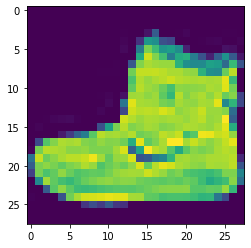

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0]

9

In [12]:
#It will show the pixels value of the image
x_train[5] 

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [14]:
#Data Normalization - normalise the data dimensions so that they are of approximately the same size
#the images are of 2d array of 28 and 28 pixel intensities,where each pixel intensity lies between 0 and 255

x_train_n = x_train / 255.0
x_test_n = x_test / 255.0

#we want the whole scale between 0 and 1 so we divide 255.0 so that we can get floating value between 0 and 1

In [15]:
x_valid , x_train = x_train_n[:5000] , x_train_n[5000:]
y_valid , y_train = y_train[:5000] , y_train[5000:]
x_test = x_test_n

In [16]:
#to view the values of datasets 
x_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
#sequential API (model structure)

model = keras.models.Sequential()

#input Layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
#we want to convert array of 28*28 pixel into a single array ,for that we are using Flatten

#hidden layer 1
model.add(keras.layers.Dense(300, activation = 'relu'))
#we want 300 neutrons in this hidden lyer for that reason we are writing 300 and since this is a classification problem so that we are using relu activation

#hidden layer 2
model.add(keras.layers.Dense(100, activation = 'relu'))

#output layer
model.add(keras.layers.Dense(10, activation = 'softmax'))
#since the classes are exclusive we use softmax


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
weights,biases = model.layers[1].get_weights()

In [33]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

In [39]:
model_history = model.fit(x_train, y_train ,epochs=30, validation_data=(x_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4844 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5306 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3752 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8675 - val_loss: 0.3708 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3629 - val_accuracy:

In [40]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
model_history.history

{'loss': [0.7236779928207397,
  0.48435667157173157,
  0.4392773509025574,
  0.4125038683414459,
  0.39399659633636475,
  0.3753809332847595,
  0.36330899596214294,
  0.3518659174442291,
  0.34169813990592957,
  0.332302987575531,
  0.3243608772754669,
  0.31503498554229736,
  0.30824723839759827,
  0.3024706542491913,
  0.29497259855270386,
  0.2893359065055847,
  0.28416046500205994,
  0.2779114246368408,
  0.27306440472602844,
  0.26765772700309753,
  0.26248979568481445,
  0.25784969329833984,
  0.25363919138908386,
  0.24861451983451843,
  0.24450451135635376,
  0.2407207190990448,
  0.23657581210136414,
  0.23294444382190704,
  0.2285480946302414,
  0.22550171613693237],
 'accuracy': [0.7644181847572327,
  0.83160001039505,
  0.8455091118812561,
  0.8563636541366577,
  0.8620181679725647,
  0.8675090670585632,
  0.8715272545814514,
  0.8748727440834045,
  0.8787999749183655,
  0.8824545741081238,
  0.8832908868789673,
  0.8863999843597412,
  0.889018177986145,
  0.891272723674774

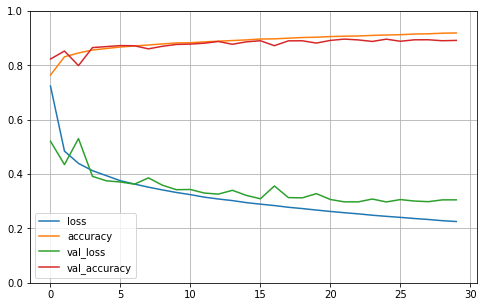

In [43]:
import pandas as pd 

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8822: 0s - loss: 0.3522 - accuracy: 


[0.33928123116493225, 0.8822000026702881]

In [45]:
x_new = x_test[:3]

In [46]:
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)